In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nanamulyanamaghfur","key":"11da37dbb74c981039e2be0329480536"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d larsen0966/student-performance-data-set

  0% 0.00/12.1k [00:00<?, ?B/s]
100% 12.1k/12.1k [00:00<00:00, 10.3MB/s]


In [6]:
!unzip student-performance-data-set.zip -d student_performance

Archive:  student-performance-data-set.zip
  inflating: student_performance/student-por.csv  


In [7]:
import pandas as pd

data = pd.read_csv("/content/student_performance/student-por.csv")

In [8]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

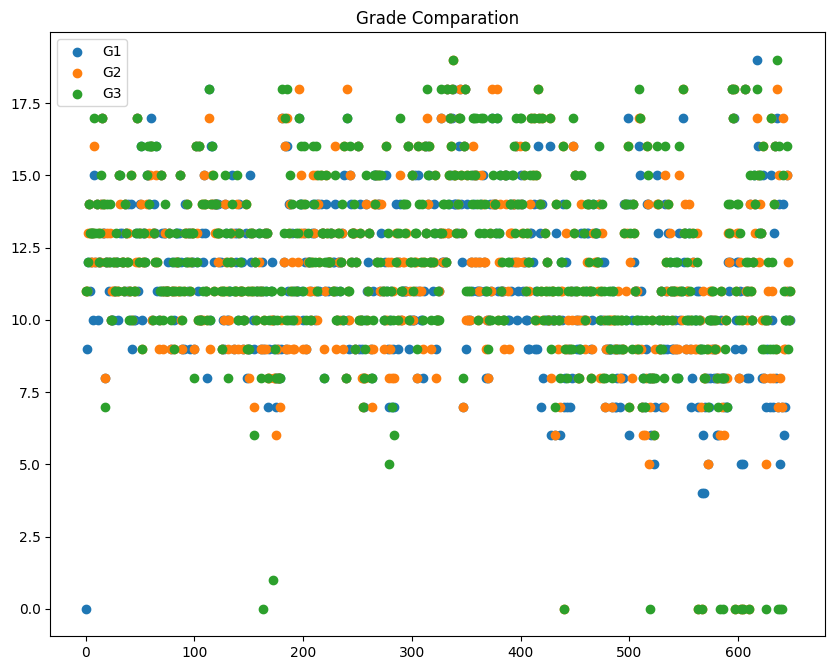

In [10]:
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(range(649), data['G1'], label=f'G1')
plt.scatter(range(649), data['G2'], label=f'G2')
plt.scatter(range(649), data['G3'], label=f'G3')

plt.title('Grade Comparation')
plt.legend()
plt.show()

In [36]:
x = data[["studytime","paid","activities", "higher", "internet", "freetime", "health", "G1", "G2"]]
y = data["G3"] 

In [37]:
categorical_columns = ['paid','activities','higher','internet']

for col in categorical_columns:
    col_ohe = pd.get_dummies(x[col], prefix=col)
    x = pd.concat((x, col_ohe), axis=1).drop(col, axis=1)

x.head()

,studytime,freetime,health,G1,G2,paid_no,paid_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes
0,2,3,3,0,11,1,0,1,0,0,1,1,0
1,2,3,3,9,11,1,0,1,0,0,1,0,1
2,2,3,3,12,13,1,0,1,0,0,1,0,1
3,3,2,5,14,14,1,0,0,1,0,1,0,1
4,2,3,5,11,13,1,0,1,0,0,1,1,0


In [38]:
import numpy as np

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

scaled_columns = ["studytime", "freetime", "health"]

for col in scaled_columns:
  x[col] = NormalizeData(x[col])

x['G1'] = x['G1'] * 5 / 100
x['G2'] = x['G2'] * 5 / 100 

x.head()

,studytime,freetime,health,G1,G2,paid_no,paid_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes
0,0.333333,0.50,0.5,0.00,0.55,1,0,1,0,0,1,1,0
1,0.333333,0.50,0.5,0.45,0.55,1,0,1,0,0,1,0,1
2,0.333333,0.50,0.5,0.60,0.65,1,0,1,0,0,1,0,1
3,0.666667,0.25,1.0,0.70,0.70,1,0,0,1,0,1,0,1
4,0.333333,0.50,1.0,0.55,0.65,1,0,1,0,0,1,1,0


In [39]:
y = y * 5 / 100

y.head()

0    0.55
1    0.55
2    0.60
3    0.70
4    0.65
Name: G3, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [42]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
r_sq = model.score(x_test, y_test)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8700570035001407
